In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
from math import *
np.random.seed(123)
import urllib.request
import urllib, os

In [2]:
import pandas as pd
import xarray as xr
import math
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
import numpy as np
import xarray as xr
import xesmf as xe

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
ds = xr.open_dataset(r'/home/shubham/ugp/cleaned/Precipitation_1979-2022(ver2).nc')

In [6]:
month_length = ds.time.dt.days_in_month
month_length

<xarray.DataArray 'days_in_month' (time: 517)>
array([28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30,
       31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30,
       31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30,
       31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30,
       31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28,
       31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31,
       31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
       31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31,
       30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31,
       30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
       29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30,
       31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30,
       31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30,
       31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30,
       31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28,
       31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31,
       31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
       31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31,
       30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31,
       30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
       28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30,
       31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30,
       31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30,
       31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30,
       31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29,
       31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31,
       31, 30, 31, 30, 31, 31, 28])
Coordinates:
  * time     (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2022-02-01

In [7]:
# Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("time.season") / month_length.groupby("time.season").sum()
)

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

# Calculate the weighted average
ds_weighted = (ds * weights).groupby("time.season").sum(dim="time")

In [8]:
ds_weighted

<xarray.Dataset>
Dimensions:        (x: 144, y: 72, season: 4)
Coordinates:
    lon            (x) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    lat            (y) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: x, y
Data variables:
    precipitation  (season, y, x) float64 0.7869 0.8117 0.8341 ... 0.5955 0.5508

In [9]:
# only used for comparisons
ds_unweighted = ds.groupby("time.season").mean("time")
ds_diff = ds_weighted - ds_unweighted

Text(0.5, 1.02, 'Seasonal Precipitation (mm/day)')

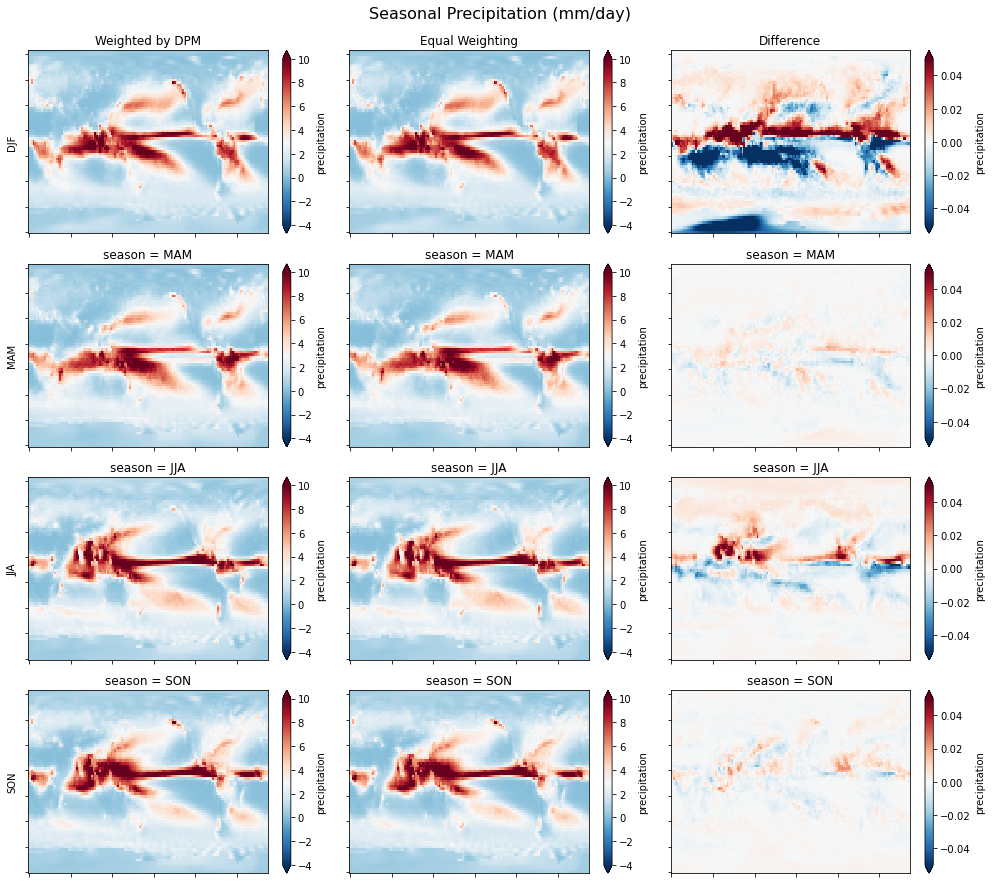

In [17]:
# Quick plot to show the results
notnull = pd.notnull(ds_unweighted["precipitation"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted["precipitation"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=-4,
        vmax=10,
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    ds_unweighted["precipitation"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=-4,
        vmax=10,
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    ds_diff["precipitation"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.05,
        vmax=0.05,
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM")
axes[0, 1].set_title("Equal Weighting")
axes[0, 2].set_title("Difference")

plt.tight_layout()

fig.suptitle("Seasonal Precipitation (mm/day)", fontsize=16, y=1.02)

In [18]:
fig.savefig('seasonal_preci.png')